In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings('ignore')  
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [6]:
from prophet import Prophet

In [8]:
#load .csv file as DataFrame
df = pd.read_csv('ENPH_Price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,1.02,1.05,1.01,1.05,1.05,445900
1,2017-01-04,1.09,1.15,1.05,1.15,1.15,903000
2,2017-01-05,1.19,1.19,1.11,1.12,1.12,308700
3,2017-01-06,1.12,1.14,1.08,1.11,1.11,259700
4,2017-01-09,1.10,1.11,1.08,1.11,1.11,180000


In [9]:
#check the null value in the column
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
df.reset_index(inplace=True)

In [11]:
data=df[["Date","Adj Close"]]

In [12]:
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

In [13]:
#now it is usable for FB Prophet

data.head()

,ds,y
0,2017-01-03,1.05
1,2017-01-04,1.15
2,2017-01-05,1.12
3,2017-01-06,1.11
4,2017-01-09,1.11


In [14]:
len(data)

1302

In [15]:
df_train=data[0:900]
df_test=data[900:1301]

In [16]:
m = Prophet()
m.fit(df_train)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=600)

In [22]:
forecast = m.predict(future)

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1095,2020-08-14,1.324188,-3.995697,6.923430
1096,2020-08-15,1.029363,-4.210169,6.664966
1097,2020-08-16,1.023573,-4.214814,6.536407
1098,2020-08-17,1.336414,-4.103894,6.954369
1099,2020-08-18,1.310677,-3.912579,6.847785


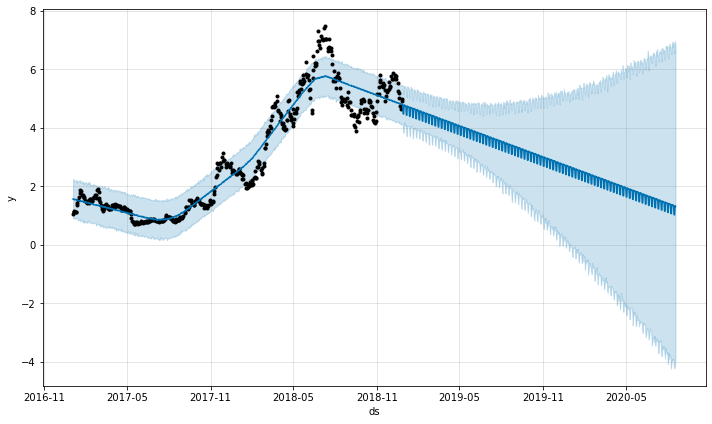

In [24]:
fig1 = m.plot(forecast)